In [1]:
import matplotlib.pyplot as plt, argparse, numpy as np, math, sys, copy
from skimage.segmentation import slic, mark_boundaries, felzenszwalb
from skimage.util import img_as_float
from scipy.cluster import hierarchy
from skimage import io
from collections import defaultdict
import numpy as np
import SPHC as sphc

In [111]:
imagePath = 'images/caneca1.jpg'

#SLIC Parameters:
numSegments = 500  # How many superpixels to start with - input for SLIC function

#SPHC Parameters:
segmentsToMerge =[400, 500]#  [70, 80, 90] #[100, 200, 300, 400, 480] #3 # How many superpixels to merge based on color similarity
distance_limit = 0.3 # Limits which segments get merged based on their difference in average color

In [112]:
image = img_as_float(io.imread(imagePath))
#segments = felzenszwalb(image, scale=200, sigma=0.5, min_size=20)
segments = slic(image, slic_zero = True)

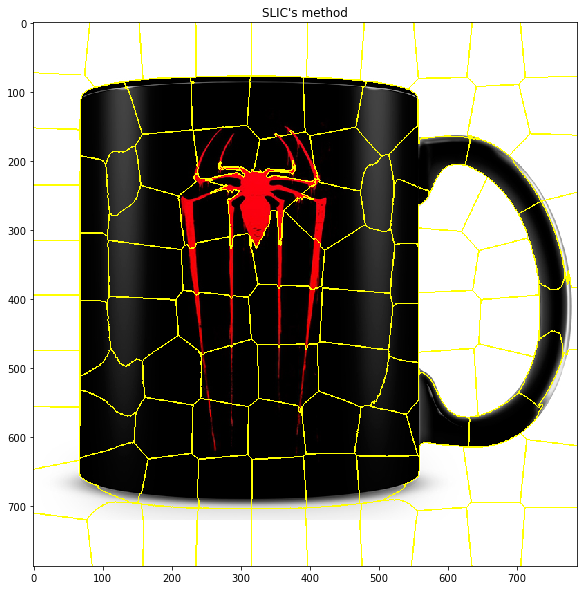

In [113]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax.imshow(mark_boundaries(image, segments))
ax.set_title("SLIC's method")
plt.show()

In [114]:
n_seg = 0

for segs in segments:
    curr_max = max(segs)
    if(curr_max > n_seg):
        n_seg = curr_max

n_seg += 1

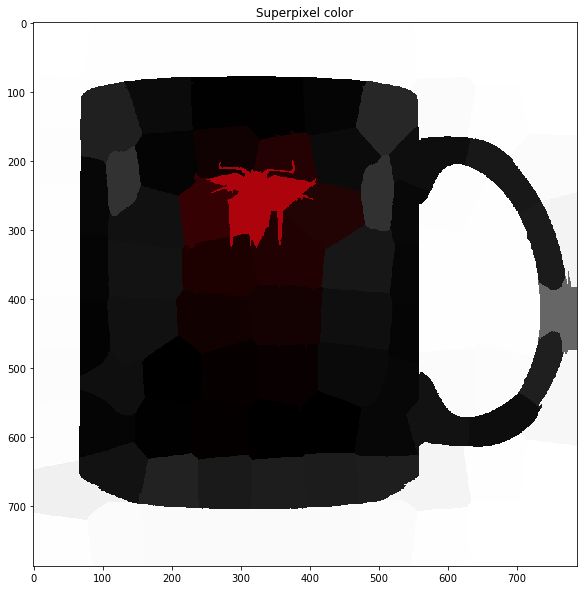

In [115]:
colors = [[.0, .0, .0] for x in range(n_seg)]
itens = [0 for x in range(n_seg)]
new_image = copy.deepcopy(image)

#replace colors
for i in range(len(segments)):
    for j in range(len(segments[i])):
        index = segments[i][j]
        colors[index] += image[i][j]
        itens[index] += 1
        
for i in range(len(itens)):
    if(itens[i] > 0):
        colors[i] = [x / itens[i] for x in colors[i]]
        
for i in range(len(segments)):
    for j in range(len(segments[i])):
        index = segments[i][j]
        new_image[i][j] = colors[index]
        
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax.imshow(new_image)
ax.set_title("Superpixel color")
plt.show() 

In [125]:
segm_size = n_seg - 10
segm_grid = sphc.getSPHCsegments(segments, image, numToMerge = segm_size, max_dist = distance_limit)

Initiating Segment Attributes...
Merging Segments...
20 segments merged
40 segments merged
60 segments merged
80 segments merged
91 segments merged - final


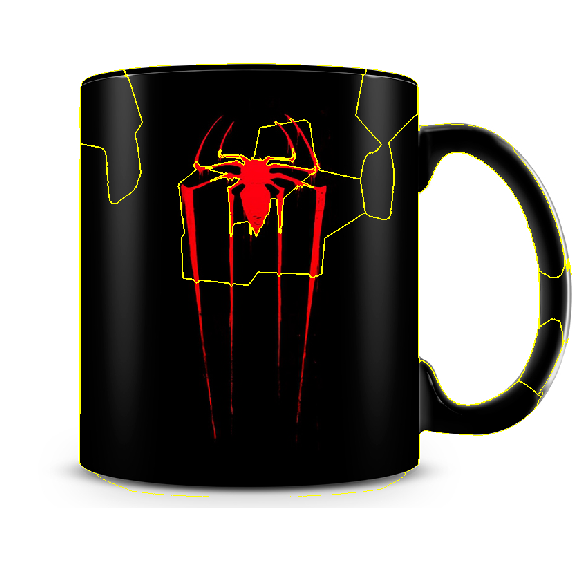

In [127]:
fig = plt.figure("Segments", figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(mark_boundaries(image, segm_grid))
plt.axis("off")
plt.show()